In [1]:
%matplotlib inline
from matplotlib import rcParams

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=Ev8YbxPu_bQ
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

*Answer here*

In [4]:
1- méthode de classifcation non supervisé créant des clusters(groupes sur la base de features similaires)
2-  (1) affectation des points de données aux clusters sur la base des centroïdes actuels 
    (2) choix des centroïdes (points qui sont le centre d'un cluster) sur la base de 
        l'affectation actuelle des points de données aux cluster.
3- la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) 
et la distance moyenne avec les points des autres groupes voisins (séparation).
4 - évaluation interne et évaluation externe. L'évaluation interne mesure la
    qualité des résultats du clustering en utilisant uniquement les données elles-mêmes, sans aucune information ou étiquette externe. 
    L'évaluation externe mesure la qualité des résultats du regroupement en les comparant à des informations externes 
    ou à des étiquettes connues à l'avance. connues à l'avance. La principale différence entre les deux types 
    d'évaluation est que l'évaluation externe nécessite des données étiquetées. 
   


SyntaxError: invalid syntax (1861716965.py, line 1)

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [8]:
df = pd.read_csv('/home/elie.poncet@Digital-Grenoble.local/Documents/ML2/ML2.3 - Intro to clustering-20230503T080929Z-001/ML2.3 - Intro to clustering/data/bank-full.csv',sep=';')             

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Print a summary of the data as well as the first 5 rows.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [17]:
df2 = df[['age', 'balance',
        'duration', 'campaign', 'pdays',
       'previous','y']]

Plot histograms of features

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>]], dtype=object)

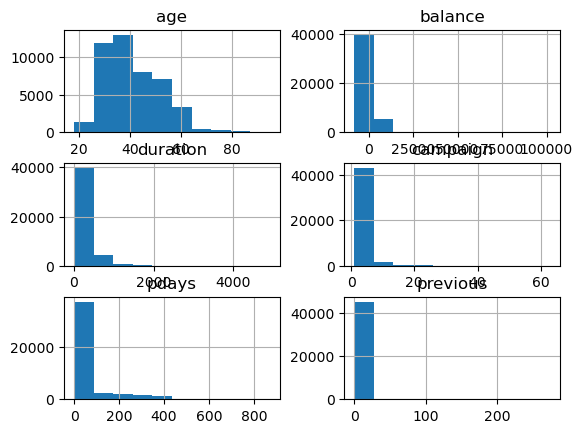

In [18]:
df2.hist()

<AxesSubplot:>

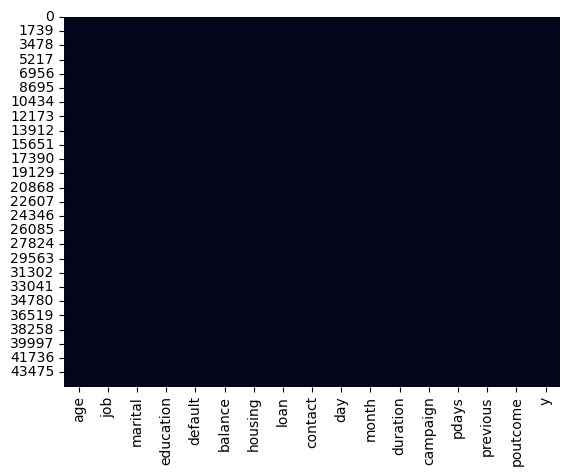

In [22]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [29]:
numerical_features = ['age','balance','duration', 'pdays','previous', 'campaign']

In [24]:
y= df2.pop('y')

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
ohot_encoder = OneHotEncoder(sparse=False)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.compose import ColumnTransformer

# cat_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy="constant")),
#     ('ohe',OneHotEncoder(handle_unknown='ignore', sparse=False)
# )
# ])

num_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="mean")),
     ('std_scaler', StandardScaler()), # try commenting in this line and running fit_transform with and without it
 ])


full_pipeline = ColumnTransformer(transformers=[
 ("num", num_pipeline, numerical_features),
#  ("cat", cat_pipeline, categorical_features),
 ])

In [31]:
df_transformed = full_pipeline.fit_transform(df)

In [33]:
df_transformed =   pd.DataFrame(df_transformed, columns=numerical_features)

In [34]:
df_transformed


,age,balance,duration,pdays,previous,campaign
0,1.606965,0.256419,0.011016,-0.411453,-0.251940,-0.569351
1,0.288529,-0.437895,-0.416127,-0.411453,-0.251940,-0.569351
2,-0.747384,-0.446762,-0.707361,-0.411453,-0.251940,-0.569351
3,0.571051,0.047205,-0.645231,-0.411453,-0.251940,-0.569351
4,-0.747384,-0.447091,-0.233620,-0.411453,-0.251940,-0.569351
...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,-0.411453,-0.251940,0.076230
45207,2.831227,0.120447,0.768224,-0.411453,-0.251940,-0.246560
45208,2.925401,1.429593,3.373797,1.436189,1.050473,0.721811
45209,1.512791,-0.228024,0.970146,-0.411453,-0.251940,0.399020


## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


*Answer here*

In [ ]:
1 - point d'equilibre entre différent point, centre d'une sphére. 
2- on le place de manière aléatoire , on regarde les point les plus proche, on créer un cluster, on déplace le centroid au centre 
du cluster, on recommence plus proche
3- oui

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [19]:
from sklearn.cluster import KMeans

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [66]:
from sklearn.cluster import KMeans
import pandas as pd


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_transformed)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(labels,centroids)

[2 4 4 ... 0 2 1] [[-0.06371943  0.04452585  2.57288184 -0.2599121  -0.15726202 -0.10879855]
 [-0.14775834 -0.0113134  -0.09579473  2.23060197  1.29957583 -0.20789304]
 [ 1.10041579  0.23963423 -0.23597696 -0.32629781 -0.18500887 -0.10629825]
 [-0.06907415 -0.09568877 -0.45132617 -0.39988827 -0.24060095  3.92040535]
 [-0.64464758 -0.15020396 -0.22252849 -0.37499956 -0.22015935 -0.15645215]]


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Print the centroids obtained

Print the cluster labels assigned to each point

In [0]:
# code here

### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
pca.fit(df_transformed)
df_pca = pca.transform(df_transformed)


labels = kmeans.labels_


In [63]:
import numpy as np
max_index = df_pca[:, 0].argmax()  # Get the index of the maximum value in the first column
df_pca = np.delete(df_pca, max_index, axis=0) 
labels = np.delete(labels, max_index, axis=0) 

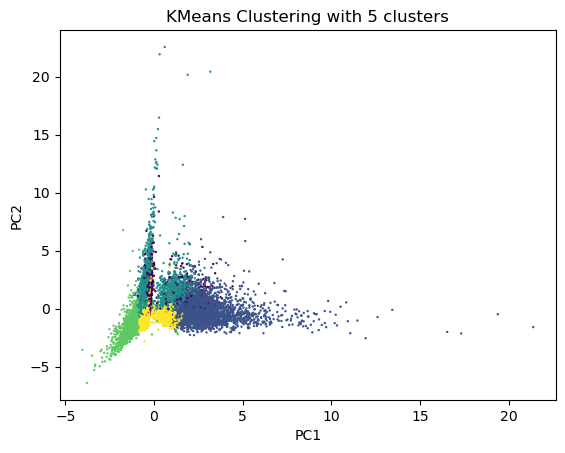

In [64]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis',s= 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering with 5 clusters')
plt.show()

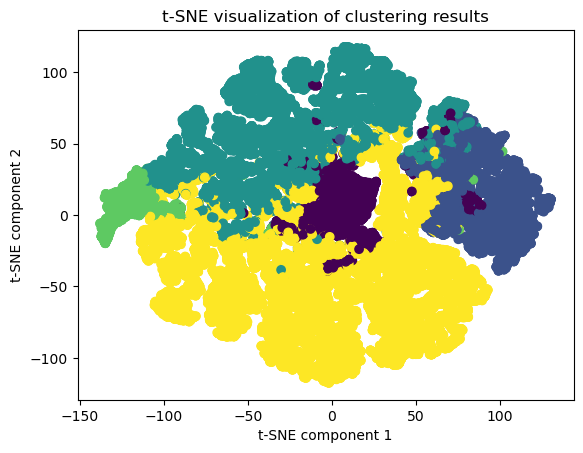

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(df_transformed)





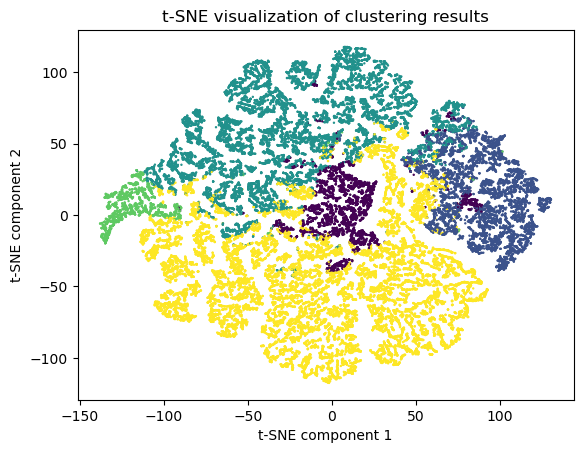

In [69]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels,s=0.5)
plt.title("t-SNE visualization of clustering results")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [70]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 146856.8195914033


**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [95]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(df_transformed, kmeans.labels_)
print(f"Silhouette score: {silhouette}")

Silhouette score: 0.24473251745274582


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.3985425651260263


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.25936599042780306


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.2769169254903558


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.29873095325160415


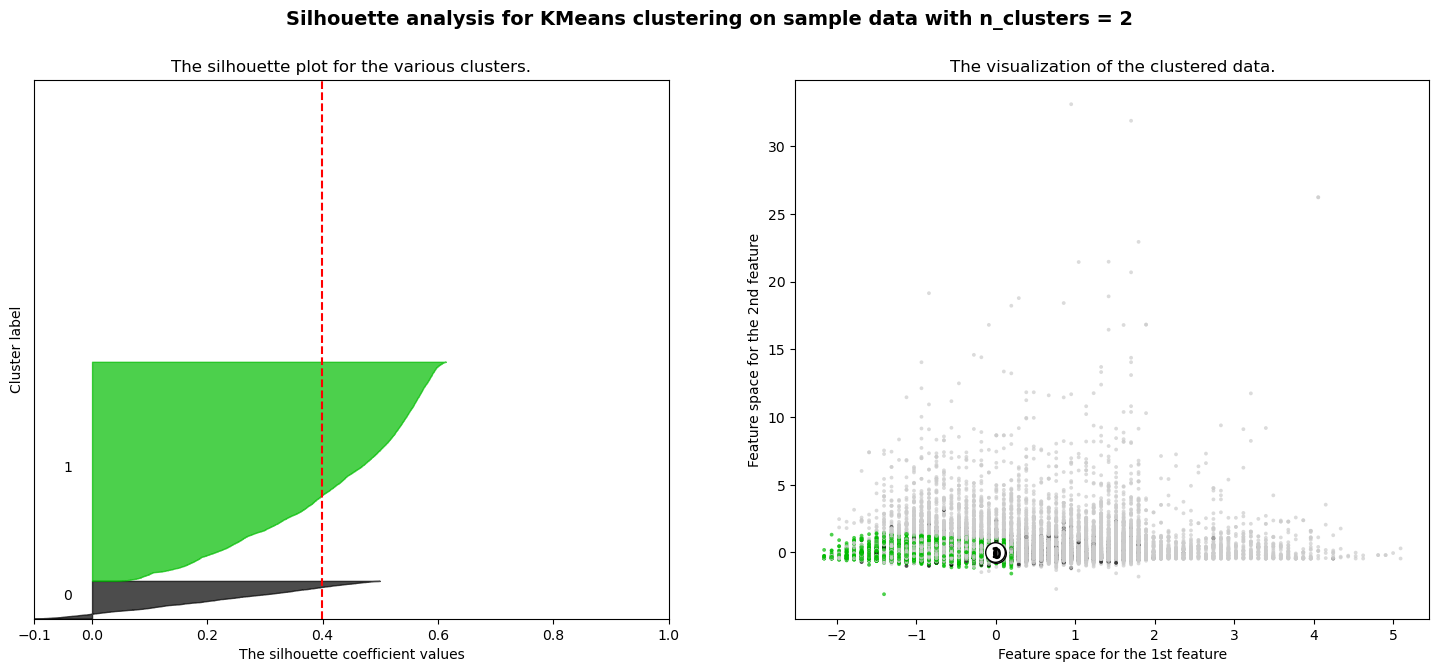

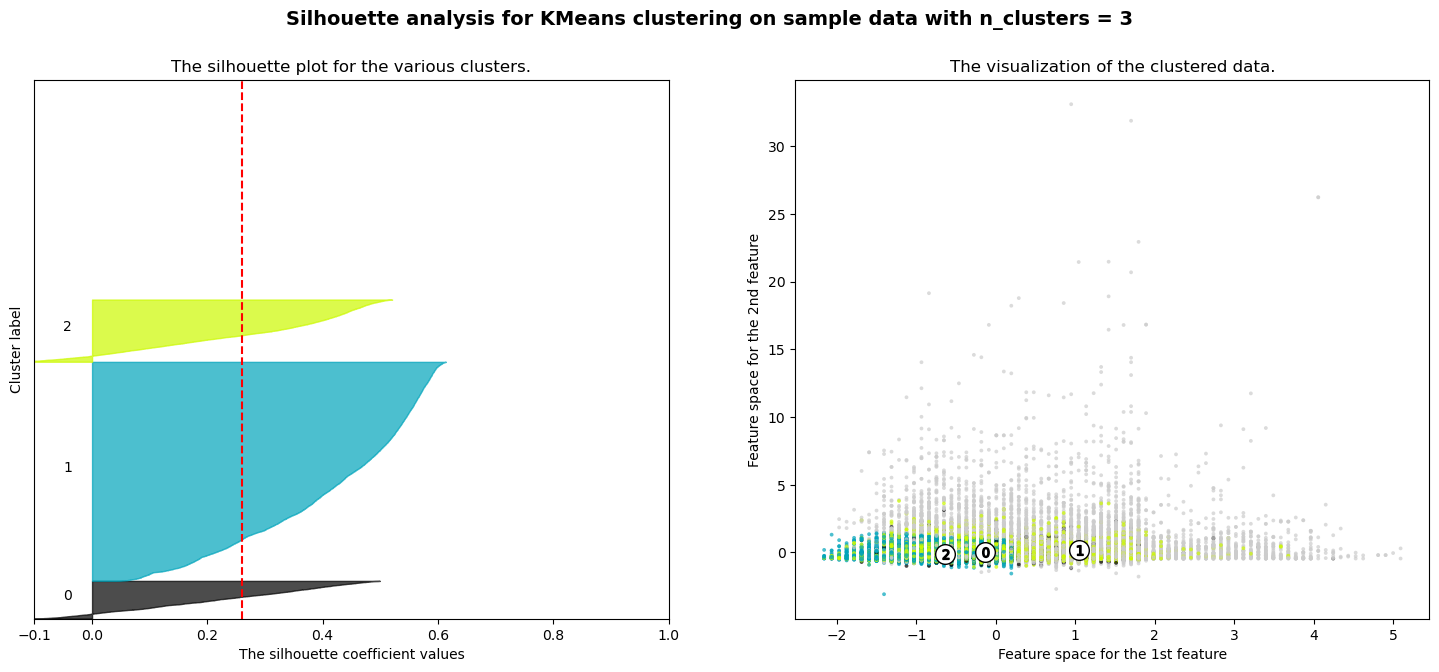

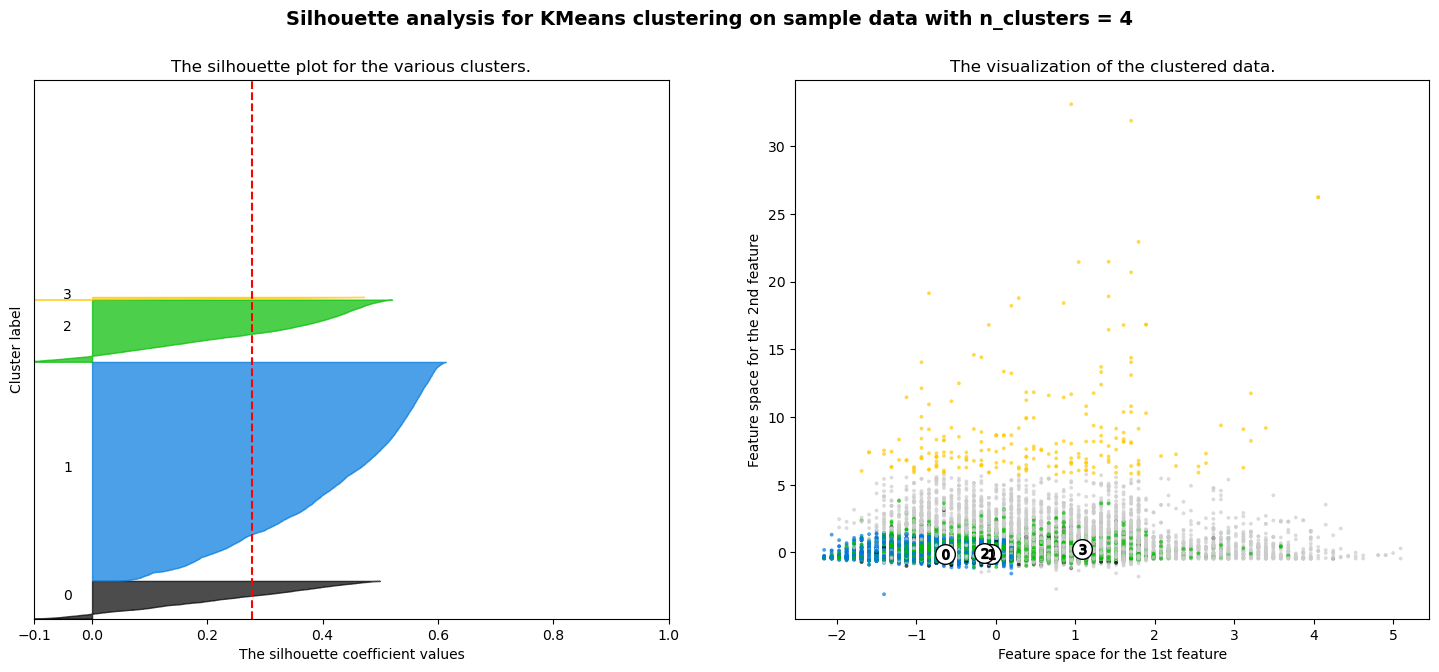

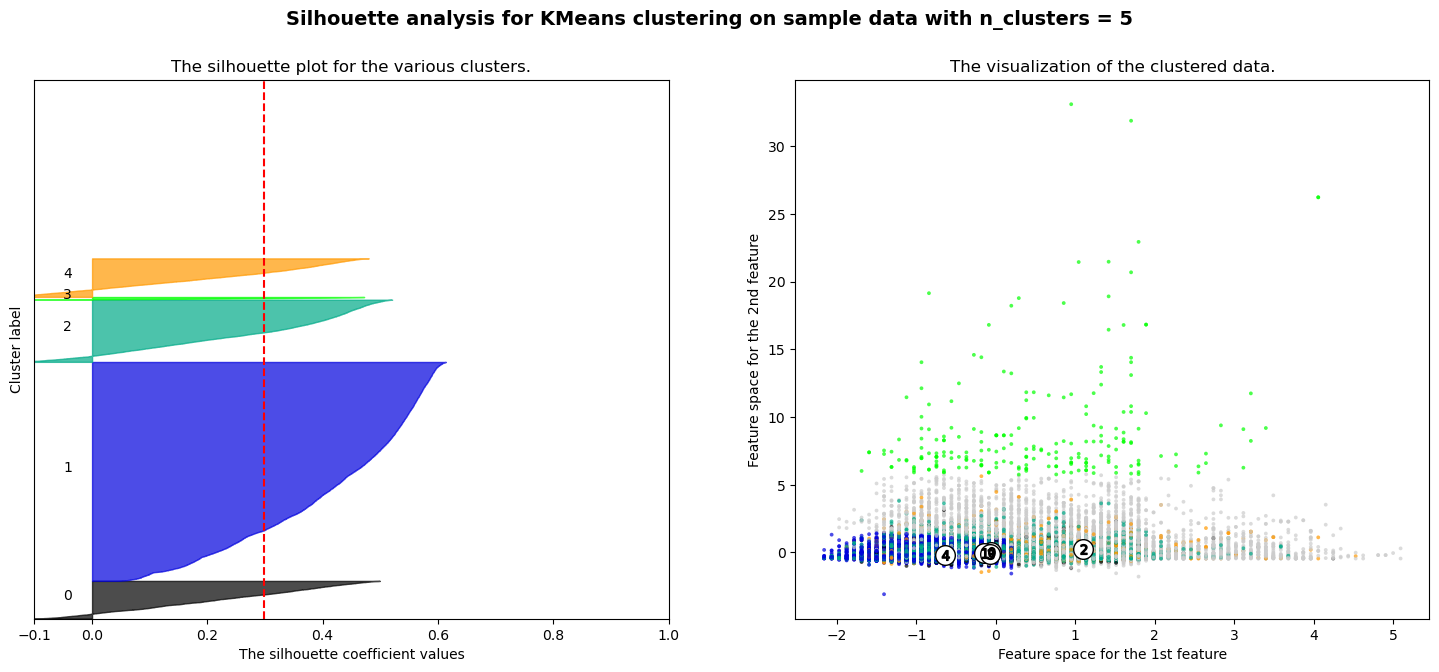

In [97]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
sil_list=[]
n_clusters_list=[]
inertia=[]
# Assuming your DataFrame is named 'data_transformed'
# If it's not already a NumPy array, you can convert it as follows:
X = df_transformed.to_numpy()
#X = df_transformed
range_n_clusters = [2, 3, 4, 5]
#range_n_clusters = [2]
for n_clusters in range_n_clusters:
    # (The rest of the code remains unchanged)
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=42)
#     clusterer.fit(df_transformed)
#     labels = clusterer.labels_
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sil_list.append(silhouette_avg)
    n_clusters_list.append(n_clusters)
    inertia.append(kmeans.inertia_)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
sil_list
n_clusters_list
inertia

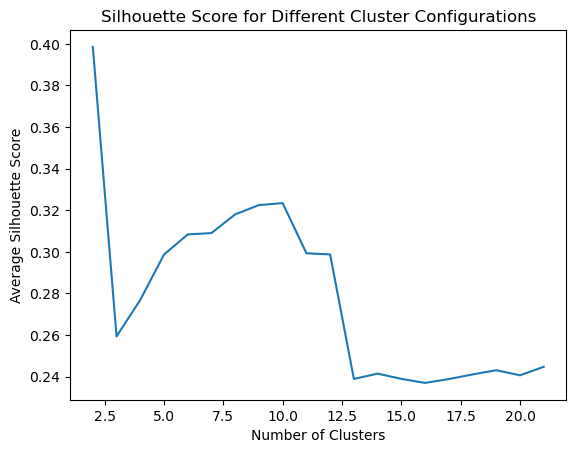

In [91]:
plt.plot(n_clusters_list, sil_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Cluster Configurations')
plt.show()


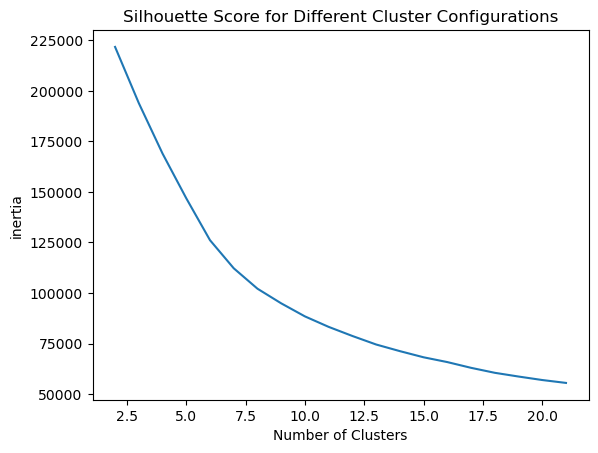

In [90]:
plt.plot(n_clusters_list, inertia_l)
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.title('Silhouette Score for Different Cluster Configurations')
plt.show()

In [89]:
sil_list=[]
n_clusters_list=[]
inertia_l=[]
for i in range(2,22):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_transformed)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    print(f"Inertia: {inertia}")
    silhouette = silhouette_score(df_transformed, kmeans.labels_)
    print(f"Silhouette score: {silhouette}",i)
    sil_list.append(silhouette)
    n_clusters_list.append(i)
    inertia_l.append(inertia)

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 221692.3378395315
Silhouette score: 0.3985425651260263 2
Inertia: 193908.36284732068


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.25936599042780306 3
Inertia: 168972.97991104523


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.2769169254903558 4
Inertia: 146856.81959140333


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.29873095325160415 5
Inertia: 126141.24033599594


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.30837716544903543 6
Inertia: 112253.37125525248


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.3090360596459692 7


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 102161.16253630596
Silhouette score: 0.3180338220181231 8


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 94919.06879405506
Silhouette score: 0.3224901286639217 9


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 88465.36567782496
Silhouette score: 0.32343156990144334 10


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 83280.4398479784
Silhouette score: 0.2993197761088622 11


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 78779.98418881054
Silhouette score: 0.298755282398752 12


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 74570.0247839629
Silhouette score: 0.23888530194720187 13


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 71292.84574986709
Silhouette score: 0.2414505134149834 14


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 68245.73748126146
Silhouette score: 0.23893071370615518 15


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 65876.55619528555
Silhouette score: 0.23697788450381205 16


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 63036.28826346333
Silhouette score: 0.2388250186265982 17


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 60576.72986236356
Silhouette score: 0.2410571879048374 18


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 58732.19273513101
Silhouette score: 0.24307535918746961 19


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 57006.13840658567
Silhouette score: 0.24063994328171048 20


/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 55574.8105551975
Silhouette score: 0.24473251745274582 21


You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [0]:
# code here

What is the optimal number of clusters that you obtained?

*Answer here*

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [0]:
# code here

How many clusters did you find?

*Answer here*

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [0]:
# code here

### Application: clustering images (Optional)

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [102]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [103]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)



(1797, 64)


<Figure size 640x480 with 0 Axes>

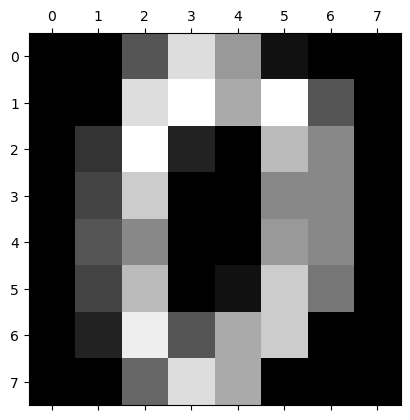

In [104]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])

plt.show()

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


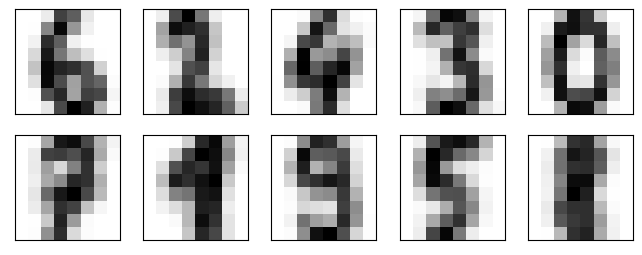

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits


digits = load_digits()

kmeans = KMeans(n_clusters=10,random_state=28
               )

kmeans.fit(digits.data)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for i, axi in enumerate(ax.flat):
    center_image = cluster_centers[i].reshape(8, 8)
    axi.imshow(center_image, cmap='binary')
    axi.set_xticks([])
    axi.set_yticks([])
    
plt.show()

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [159]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode
#on créer un vecteur rempli de 0 de la taille de notre cluster_label ( les prédictions)
labels_map = np.zeros_like(cluster_labels)
for i in range(10):
    mask = (cluster_labels == i) 
    #(creer un mask ytrue false pour chaque chiffre de la taille de cluster label)
    labels_map[mask] = mode(digits.target[mask])[0]
    #pour chaque chiffre (donc chaque valeur de mask), remplace les valeur 
    #aux index correspondant



/tmp/ipykernel_24981/522987215.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_map[mask] = mode(digits.target[mask])[0]


In [134]:
labels_map = np.zeros_like(cluster_labels)

In [138]:
mask = (cluster_labels == 2)
mask

array([False,  True,  True, ...,  True, False, False])

IndexError: invalid index to scalar variable.

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [156]:
accuracy = accuracy_score(digits.target, labels_map)

print("Accuracy:", accuracy)

Accuracy: 0.7896494156928213


Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

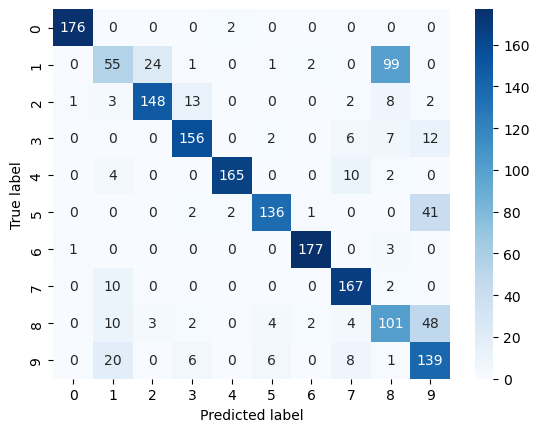

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(digits.target, labels_map)

# Create heatmap of confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [0]:
# code here

/home/elie.poncet@Digital-Grenoble.local/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_24981/4147470715.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels_map[mask] = mode(digits.target[mask])[0]


Accuracy: 0.9454646633277685


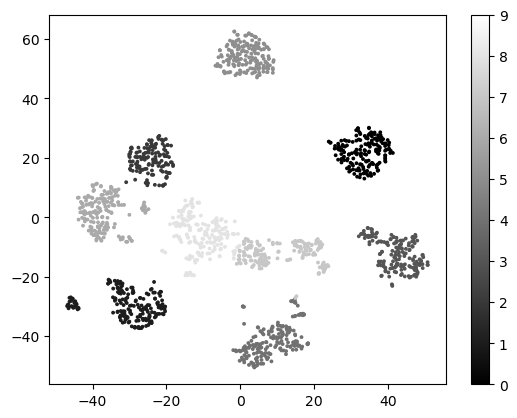

In [166]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_tsne)
cluster_labels = kmeans.labels_

labels_map = np.zeros_like(cluster_labels)
for i in range(10):
    mask = (cluster_labels == i) 
    labels_map[mask] = mode(digits.target[mask])[0]

accuracy = accuracy_score(digits.target, labels_map)    
print("Accuracy:", accuracy)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, s = 3)
plt.colorbar()
plt.show()